In [53]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Load

In [54]:
df = pd.read_csv('Data/CarPrice_Assignment.csv')

In [55]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data type and columns checking

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [57]:
for col in df.columns:
    if df[col].dtype == object or df[col].dtype == "string":
        df[col] = df[col].str.strip()

# Duplicate checking

In [58]:
df.duplicated().sum()

np.int64(0)

# Null values checking

In [59]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Outliers checking

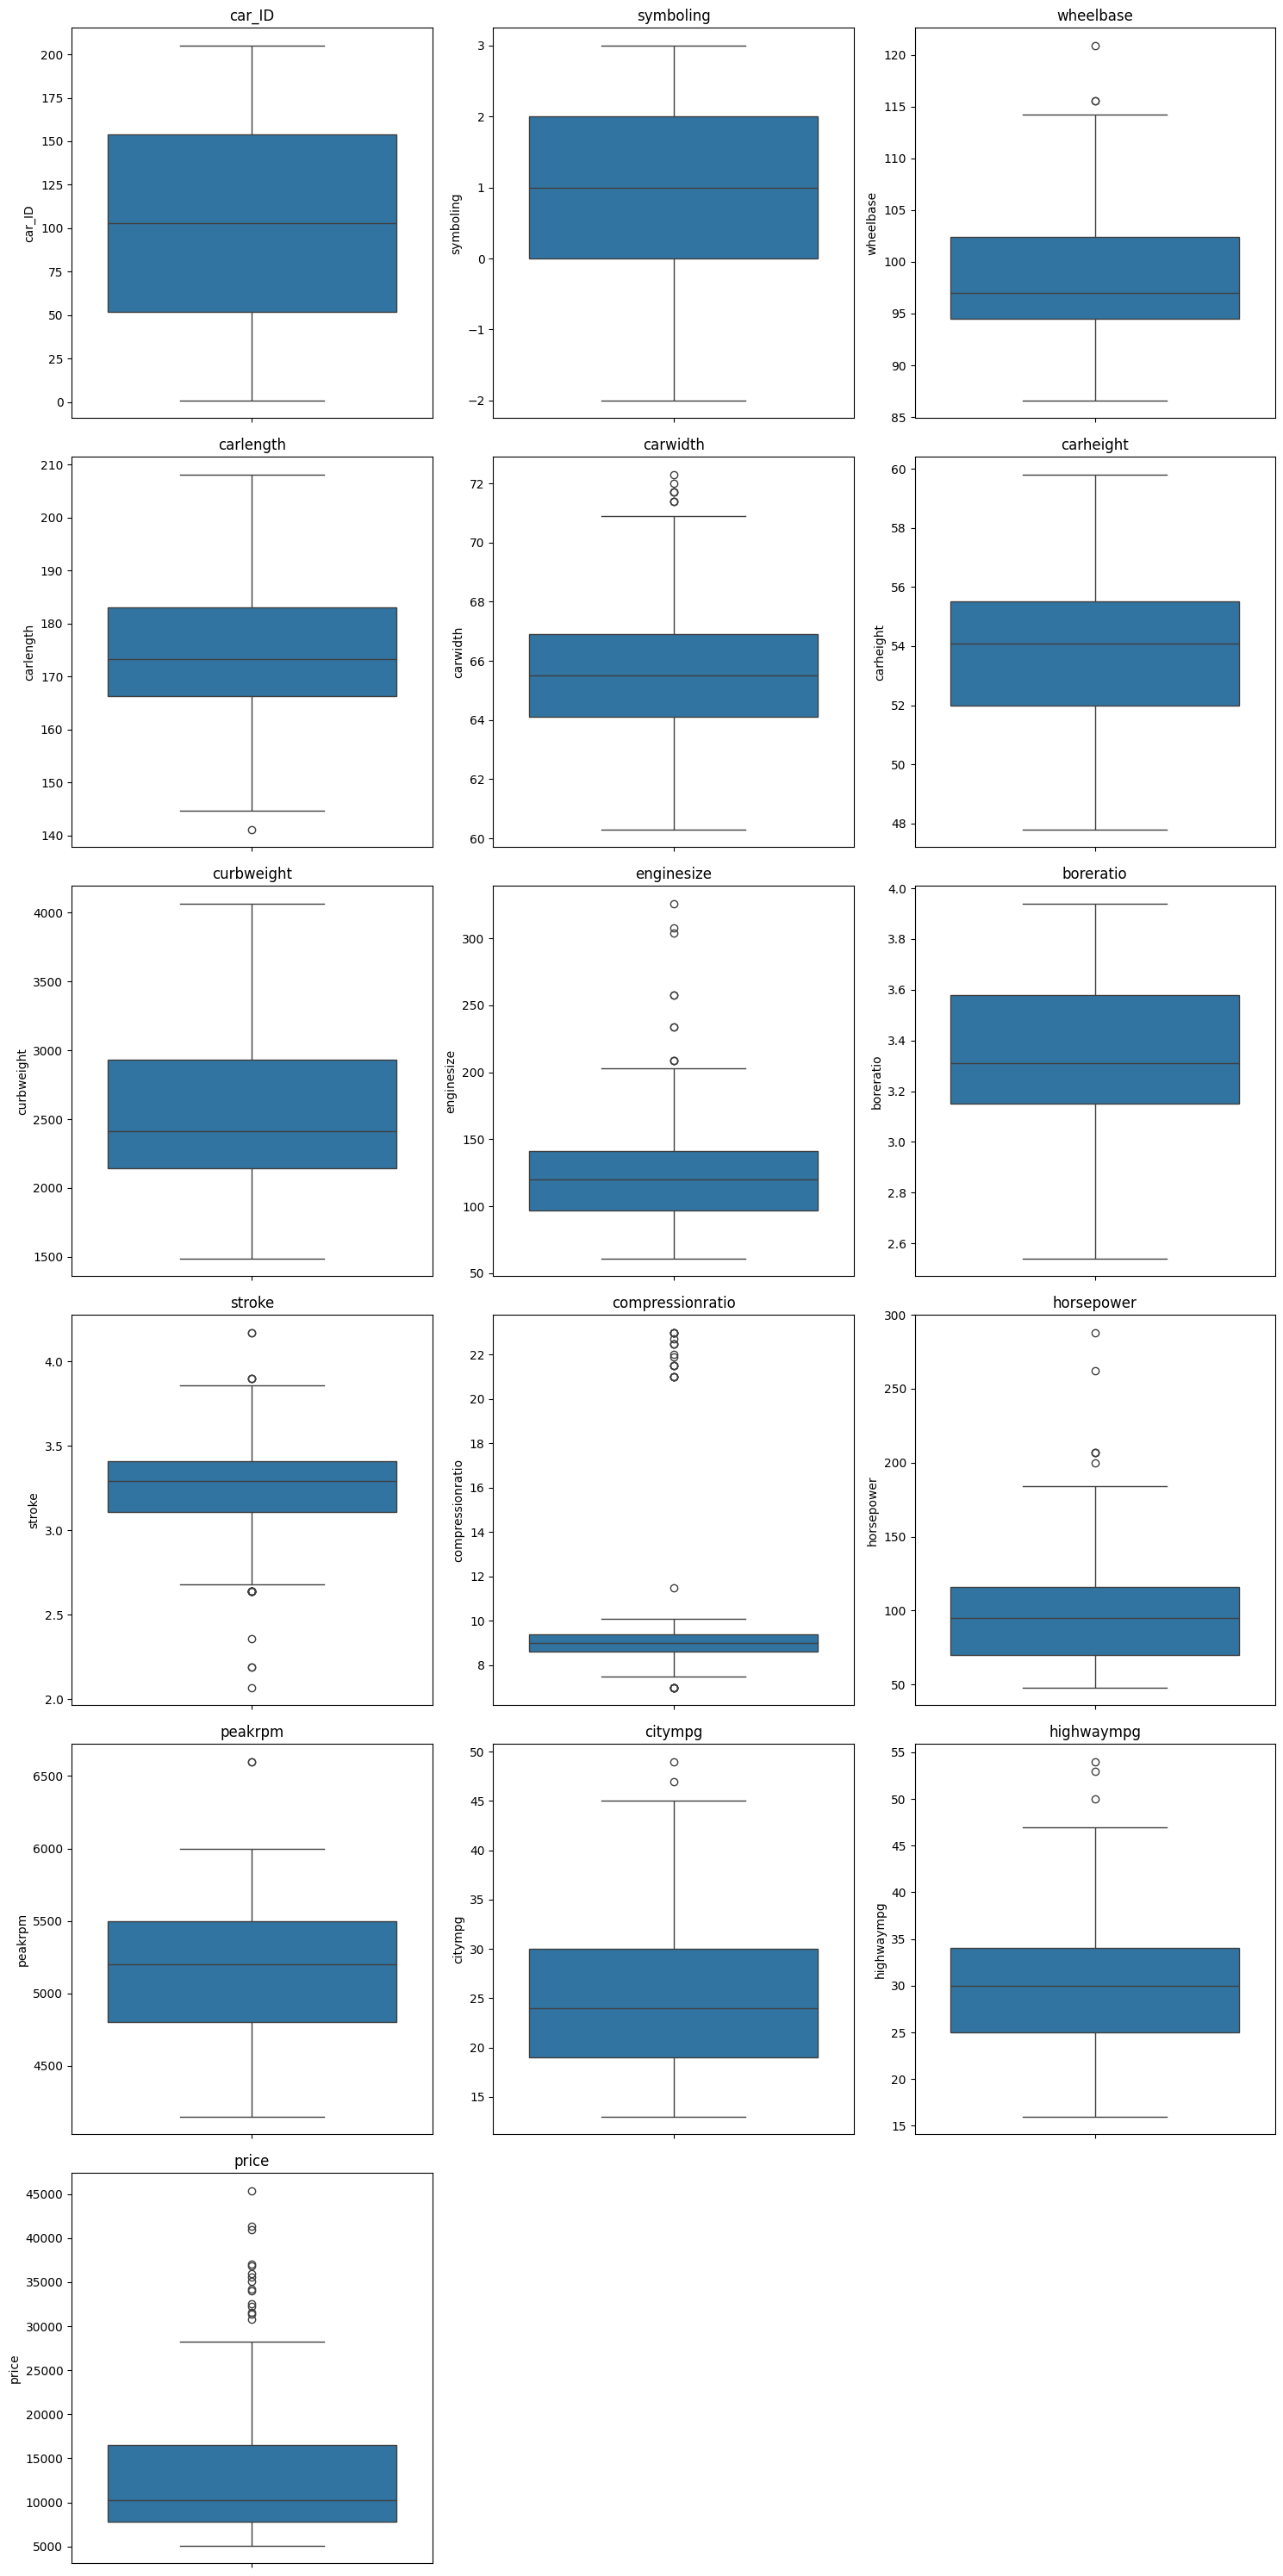

In [60]:
import math

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
n = len(numeric_cols)

rows = math.ceil(n / 3)
cols = 3

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [61]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

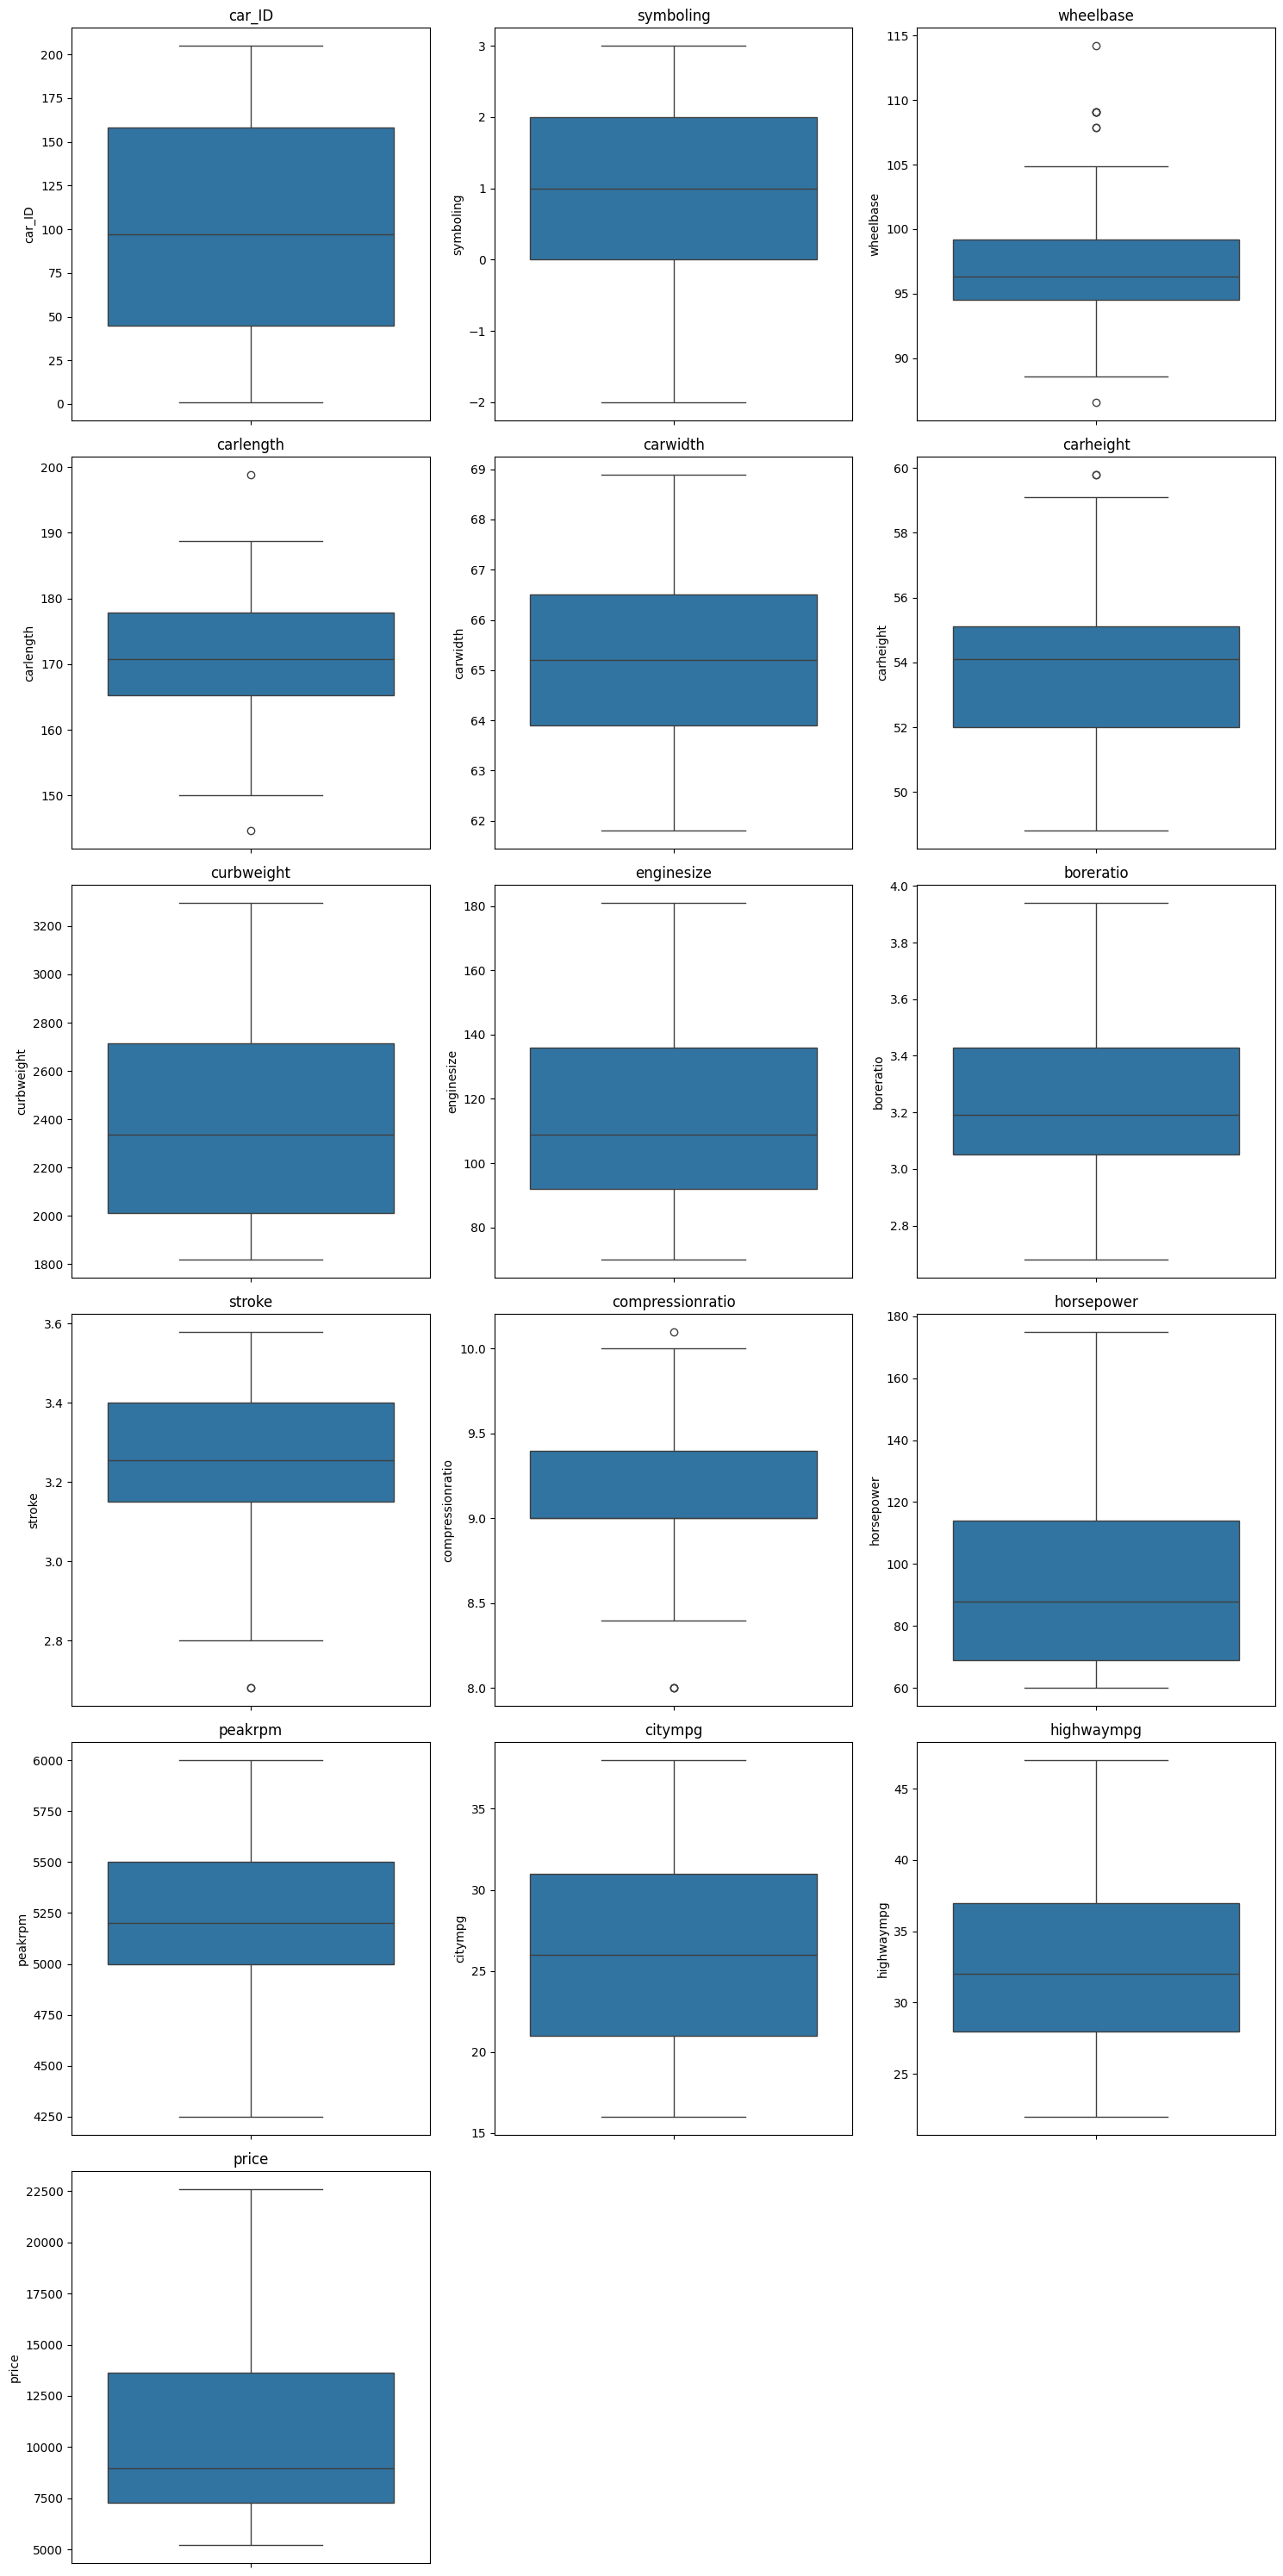

In [62]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
n = len(numeric_cols)

rows = math.ceil(n / 3)
cols = 3

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Encoding and spleting and modeling:

In [65]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)


lin_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression":  Ridge(alpha=1.0, random_state=None) if "random_state" in Ridge().get_params() else Ridge(alpha=1.0),
    "Lasso Regression":  Lasso(alpha=0.001, max_iter=10000)
}
tree_models = {
    "Random Forest":      RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting":  GradientBoostingRegressor(n_estimators=300, random_state=42)
}

results = {}


for name, mdl in lin_models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler(with_mean=False)), 
        ("model", mdl)
    ])
    pipe.fit(X_train_final, y_train)
    y_pred = pipe.predict(X_test_final)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2":   r2_score(y_test, y_pred)
    }

for name, mdl in tree_models.items():
    mdl.fit(X_train_final, y_train)
    y_pred = mdl.predict(X_test_final)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2":   r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T.sort_values("RMSE")
print(results_df)


c:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.490e+05, tolerance: 2.025e+05
  model = cd_fast.enet_coordinate_descent(


                            RMSE           R2
Random Forest        1341.925614     0.878020
Ridge Regression     1541.168994     0.839108
Gradient Boosting    1542.340174     0.838864
Lasso Regression    14210.493365   -12.678909
Linear Regression  145027.336469 -1423.731094
